In [79]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
import warnings
warnings.filterwarnings("ignore")

##### In this project, I will try to predict "Briançon" rainfall by building a model that calculates this parameter based on 7 stations rainfall, that exists in the same region.


In [81]:
df=pd.read_excel(r"C:\Users\BIADI\Desktop\First\Second\Pluie.xlsx")
df=df.rename(columns={"La Condamine":"Condamine","Le Lauzet":"Lauzet"})


## Step 1: Data spliting

In [82]:
Train = df.iloc[-588:-294, :]
Test = df.iloc[-294:, :]
Train_

## Step 2: Exploring the train data set

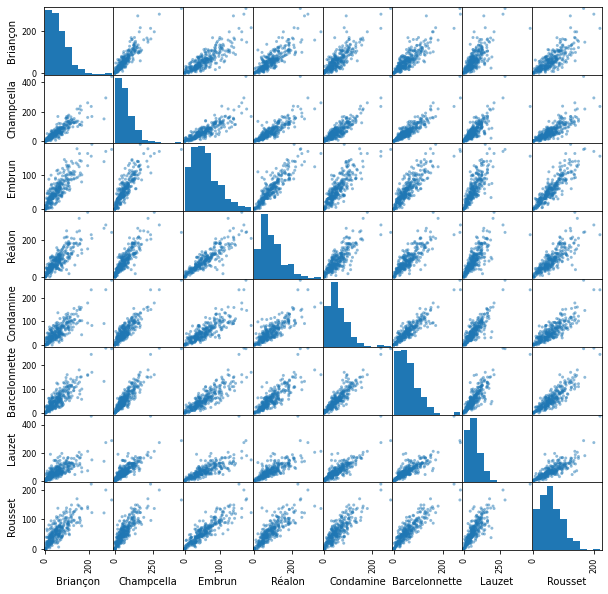

In [83]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

## Checking the correlation of each station with "Briançon"

In [85]:
corr_array = Train.corr()["Briançon" ]
print(corr_array)

Briançon         1.000000
Champcella       0.894102
Embrun           0.837723
Réalon           0.821855
Condamine        0.816236
Barcelonnette    0.850173
Lauzet           0.742236
Rousset          0.802853
Name: Briançon, dtype: float64


##### We can notice that all the stations have a strong correlation with "Briançon"

## Step 3: Building the model using Multiple linear regression

In [89]:
formula = 'Briançon~Champcella+Embrun+Réalon+Condamine+Barcelonnette+Lauzet+Rousset'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Briançon   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.39e-103
Time:                        23:51:35   Log-Likelihood:                -1303.1
No. Observations:                 294   AIC:                             2622.
Df Residuals:                     286   BIC:                             2652.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4959      2.394      0.625      0.533      -3.216       6.208
Champcella        0.5120      0.060      8.594      0.000       0.395       0.629
Embrun            0.2243      0.086      2.602      0.010       0.055       0.394
Réalon            0.0712      0.048      1.473      0.142      -0.024       0.166
Condamine        -0.0090      0.082     -0.110      0.912      -0.170       0.152
Barcelonnette     0.1419      0.087      1.639      0.102      -0.028       0.312
Lauzet           -0.0651      0.048     -1.370      0.172      -0.159       0.028
Rousset           0.0490      0.083      0.590      0.556      -0.114       0.212
==============================================================================
Omnibus:                       85.828   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.571
Skew:                           1.031   Prob(JB):                    1.50e-113
Kurtosis:                       9.177   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 4: Make prediction

In [71]:
Train_Predicted = lm.predict(Train)
Test_Predicted = lm.predict(Test)
Train_2["Train_Predicted"]=Train_Predicted 
Test_2["Test_Predicted"]=Test_Predicted

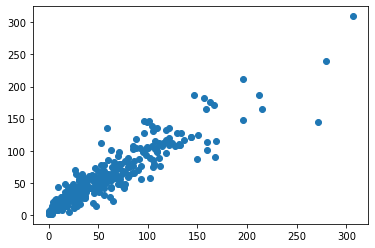

In [72]:
plt.scatter(Train_2['Briançon'], Train_2['Train_Predicted'])

## Step 5: Model evaluation

We will measure the performance of our model using some statistical metrics - **RMSE**, **Adjusted $R^2$ **

In [74]:
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE


def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [77]:
assessTable(Test, Train, lm, 7, 'Briançon')

,Train,Test
R2,0.818627,0.791765
RMSE,20.640355,18.851001


This results shows that we can use our model to predict Briançon's rainfall in the future